# Q. 7	YUM, ORANGE JUICE!

Submitted by: Jaswinder Narain, 
MMAI

Submitted to: Dr. Stephen W. Thomas


1.	[Text] Choose an appropriate metric to analyze your model's performance. Justify. (Max 300 characters, including spaces.)
2.	[Code] Build a prediction model as follows:
a.	Preprocess the data however you see fit. In code comments, describe what you did and why.
b.	Split the data into training and testing sets. In code comments, describe what you did and why.
c.	Build three different models, using three different machine learning algorithms. (Any three will do.) Tune each model. Print out the best hyperparameter values for each model. Print out performance of each fine-tuned model.


The file OJ.csv contains the following features:

WeekofPurchase: The week of purchase
    
StoreID: Store ID
    
PriceCH: The price of CH during that week
    
PriceMM: The price of MM during that week
    
DiscCH: The discount offered (percentage) for CH that week
    
DiscMM: The discount offered (percentage) for MM that week
    
SpecialCH: An indicator of whether there was a special mention of CH in that week's flyer
    
SpecialMM: An indicator of whether there was a special mention of MM in that week's flyer
    
LoyalCH: Historical customer brand loyalty measure for CH
    
Purchase: The target features indicating whether the customer purchased Citrus Hill (CH) or Minute Maid (MM) orange juice.


## Import Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.23.2.


In [3]:
# Create the 'out' directory to store output images
import os
if not os.path.exists('out'):
    os.makedirs('out')

In [4]:
#read the data
df = pd.read_csv("OJ.csv")

df.info() #some information about the data
df.head() #display top 5 rows
df.tail() #display last 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WeekofPurchase  1070 non-null   int64  
 1   StoreID         1070 non-null   int64  
 2   PriceCH         1070 non-null   float64
 3   PriceMM         1070 non-null   float64
 4   DiscCH          1070 non-null   float64
 5   DiscMM          1070 non-null   float64
 6   SpecialCH       1070 non-null   int64  
 7   SpecialMM       1070 non-null   int64  
 8   LoyalCH         1070 non-null   float64
 9   Purchase        1070 non-null   object 
dtypes: float64(5), int64(4), object(1)
memory usage: 83.7+ KB


,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,CH
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,CH
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,CH
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,MM
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,CH


,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase
1065,252,7,1.86,2.09,0.1,0.00,0,0,0.587822,CH
1066,256,7,1.86,2.18,0.0,0.00,0,0,0.670258,CH
1067,257,7,1.86,2.18,0.0,0.00,0,0,0.736206,MM
1068,261,7,1.86,2.13,0.0,0.24,0,0,0.588965,CH
1069,270,1,1.86,2.18,0.0,0.00,0,0,0.671172,CH


In [12]:
#data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekofPurchase,1070.0,254.381308,15.558286,227.000000,240.000000,257.00,268.000000,278.000000
StoreID,1070.0,3.959813,2.308984,1.000000,2.000000,3.00,7.000000,7.000000
PriceCH,1070.0,1.867421,0.101970,1.690000,1.790000,1.86,1.990000,2.090000
PriceMM,1070.0,2.085411,0.134386,1.690000,1.990000,2.09,2.180000,2.290000
DiscCH,1070.0,0.051860,0.117474,0.000000,0.000000,0.00,0.000000,0.500000
DiscMM,1070.0,0.123364,0.213834,0.000000,0.000000,0.00,0.230000,0.800000
SpecialCH,1070.0,0.147664,0.354932,0.000000,0.000000,0.00,0.000000,1.000000
SpecialMM,1070.0,0.161682,0.368331,0.000000,0.000000,0.00,0.000000,1.000000
LoyalCH,1070.0,0.565782,0.307843,0.000011,0.325257,0.60,0.850873,0.999947


In [77]:
#sort data by week
df = df.sort_values(by=['WeekofPurchase'])
df.head()
df.tail()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase,Purchase_cat
97,227,2,1.69,1.69,0.0,0.0,0,0,0.744000,CH,0
1055,227,1,1.69,1.69,0.0,0.0,0,0,0.320000,MM,1
688,227,3,1.79,1.79,0.0,0.0,0,1,0.053687,MM,1
3,227,1,1.69,1.69,0.0,0.0,0,0,0.400000,MM,1
1002,227,3,1.79,1.79,0.0,0.0,0,1,0.163840,MM,1


,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase,Purchase_cat
979,278,1,1.99,2.13,0.24,0.0,0,0,0.082564,MM,1
761,278,3,2.09,2.09,0.20,0.0,0,0,0.561472,CH,0
687,278,7,2.06,2.13,0.00,0.0,0,0,0.067109,MM,1
15,278,7,2.06,2.13,0.00,0.0,0,0,0.795200,CH,0
73,278,4,2.09,2.09,0.20,0.0,0,0,0.855775,CH,0


In [279]:
#look for null values
df.isnull().sum()

WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
Purchase          0
Purchase_cat      0
dtype: int64

## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239E67C04C0>,
      dtype=object)

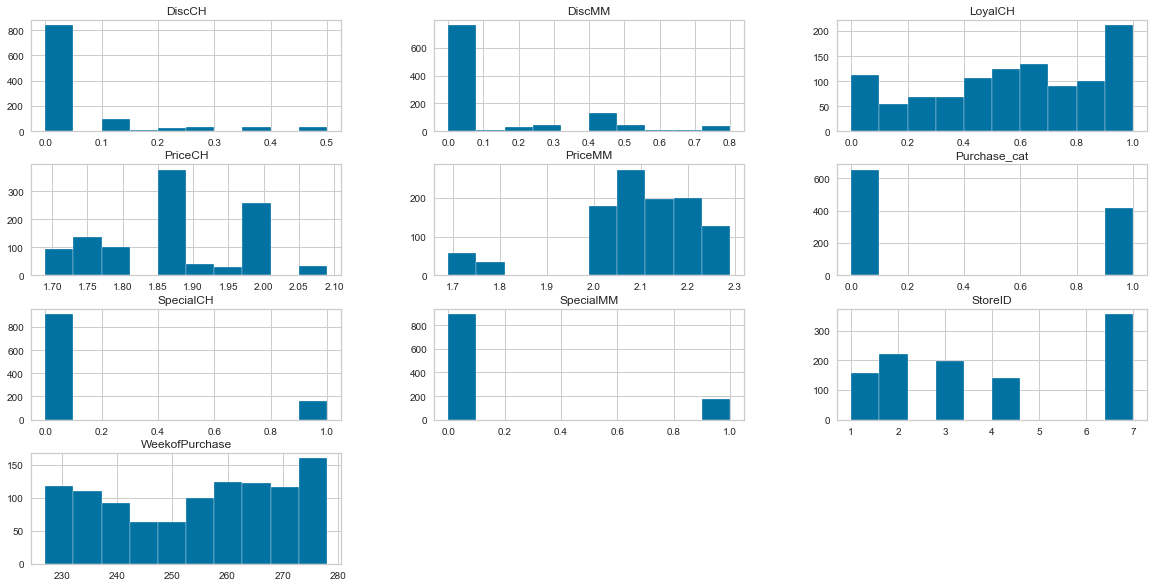

In [217]:
#hostogram of all the numeric features - want to see the ditribution of data
df.hist(figsize=(20,10))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

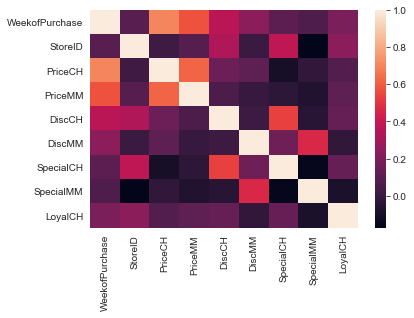

In [7]:
#heat map to see the correlation amoung features
sns.heatmap(df.corr())


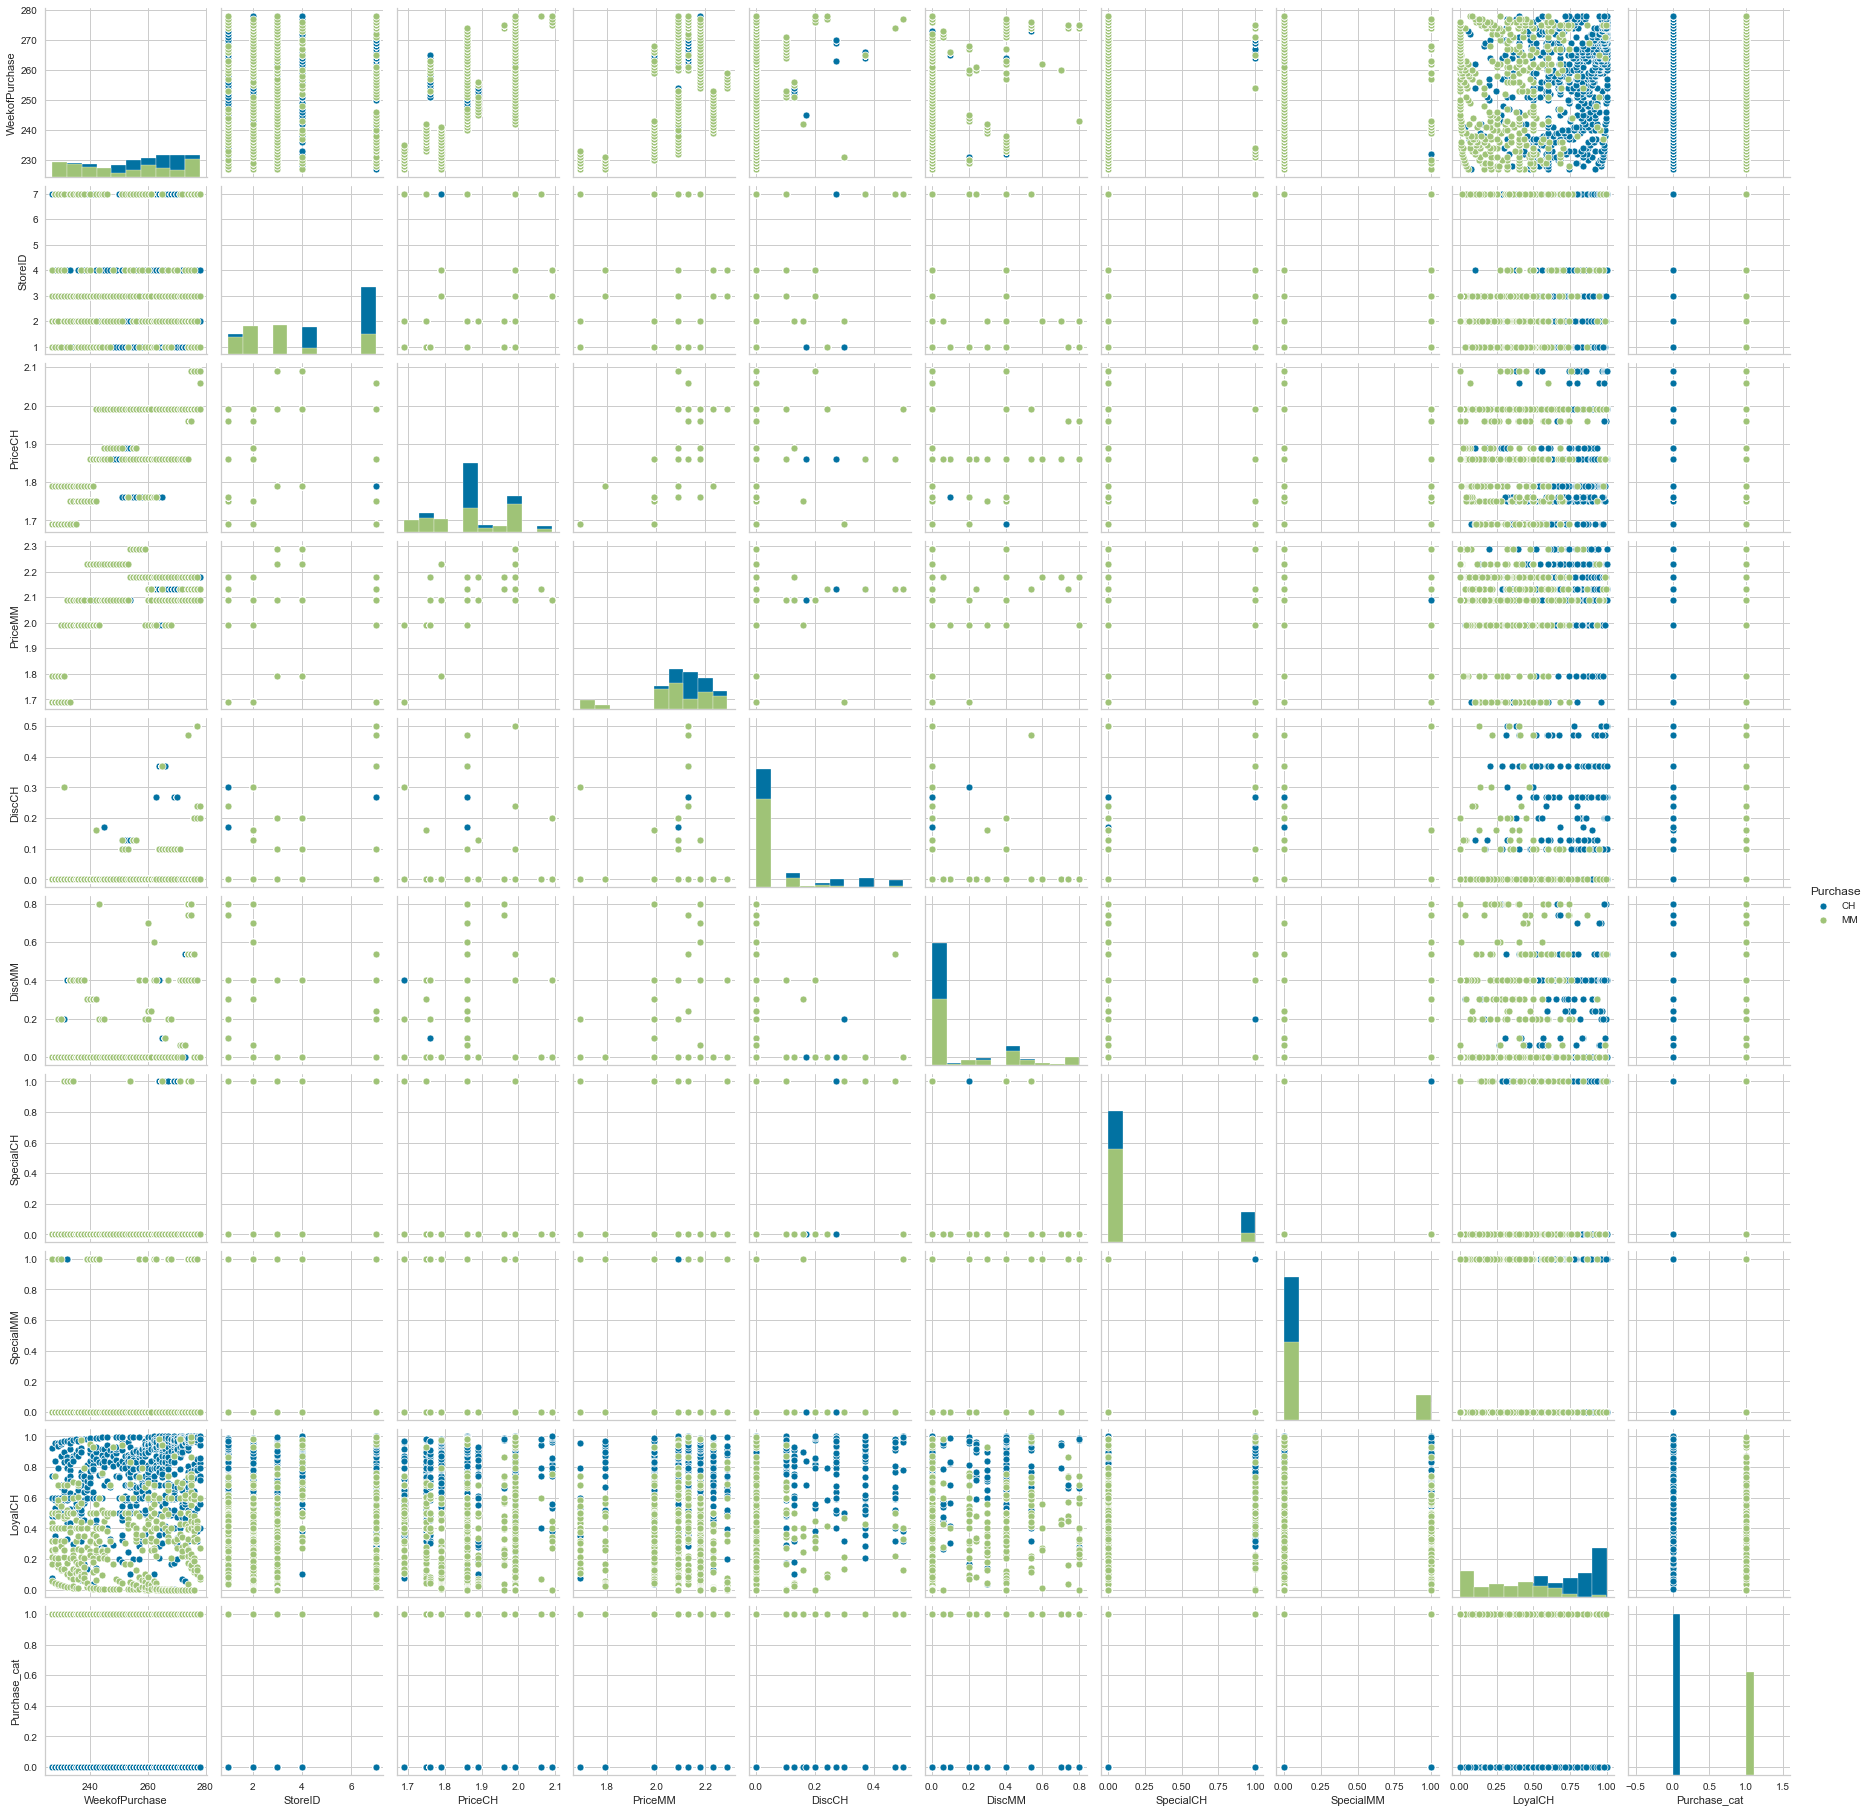

In [219]:
#pairplot with hue of Purchase - blue is CH and orange is MM
sns.pairplot(df, hue='Purchase', diag_kind="hist")

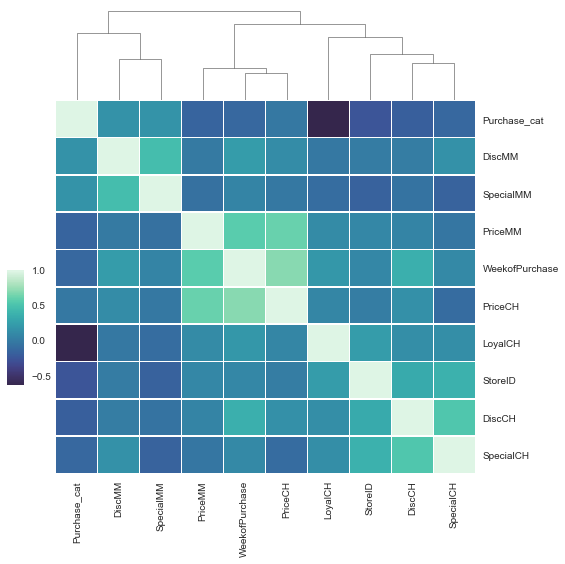

In [220]:
#clustermap - hierarchically-clustered heatmap to see if there's any correlation and clusters within the dataset.
g = sns.clustermap(df.corr(), center=0, cmap="mako",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(8, 8))

g.ax_row_dendrogram.remove()

In [319]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file("OJ_output.html")

### Convert Target into Binary Caterogy

1 is Purchase of MM (Milk Maid)

0 is Purchase of CH (Citrus Hill)


In [8]:
#created a binary catergory column of Purchase
df['Purchase_cat'] = [ 1 if x=='MM' else 0 for x in df['Purchase']]
df.columns

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'Purchase', 'Purchase_cat'],
      dtype='object')

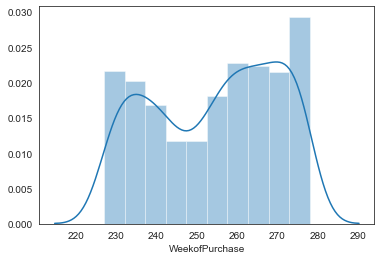

In [35]:
#see the distribution of Week of Purchase
sns.distplot( df["WeekofPurchase"] )


In [221]:
#created the pivot table to understand the distribution of weekly purchase what which juice is purchased more in which week
df_pivot= df.pivot_table('Purchase_cat', index = 'WeekofPurchase', columns = 'Purchase', aggfunc='count')


Text(0.5, 0, 'Week of Purchase')

Text(0, 0.5, 'Count of MM And CH')

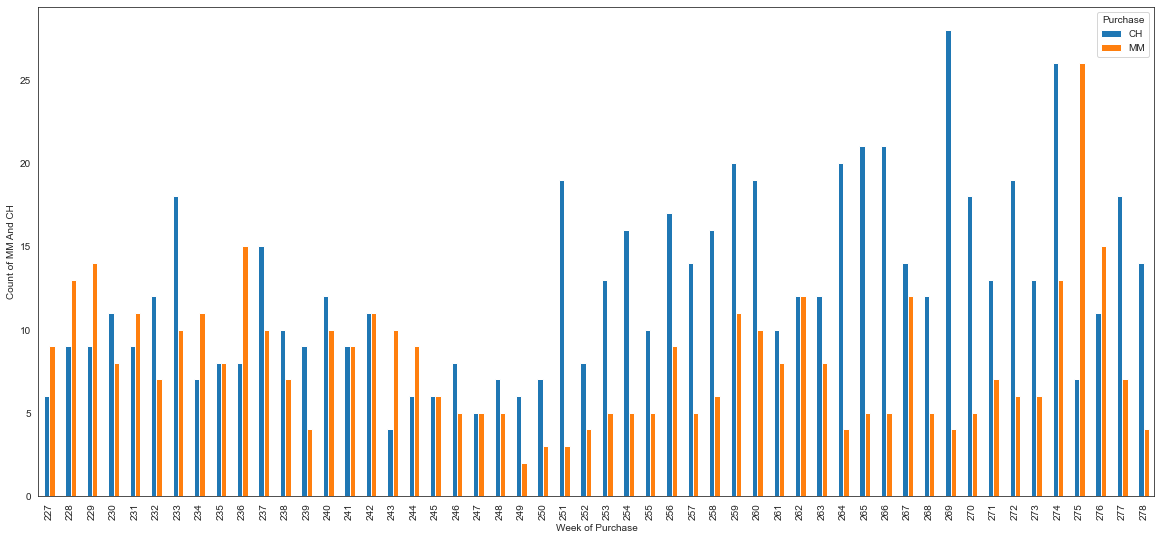

In [96]:
#see how the sales of CH and MM changes over weeks
df_pivot.plot(kind='bar', figsize=(20,9))
plt.xlabel('Week of Purchase')
plt.ylabel('Count of MM And CH')

In [280]:
df.columns

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'Purchase', 'Purchase_cat'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'WeekofPurchase')

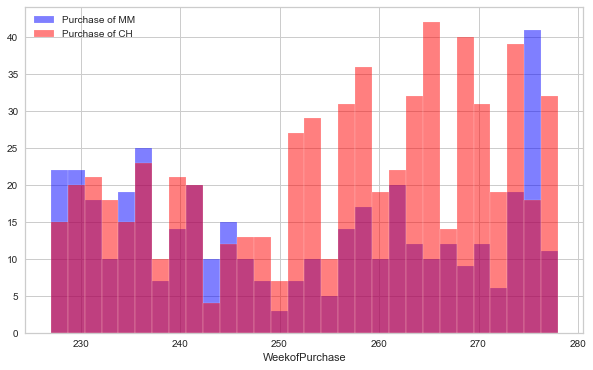

In [323]:
#histogram of Week of Purchase with MM and CH purchase and Red color is where both are purchased
plt.figure(figsize=(10,6))
df[df['Purchase_cat']==1]['WeekofPurchase'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Purchase of MM')
df[df['Purchase_cat']==0]['WeekofPurchase'].hist(alpha=0.5,color='red',
                                              bins=30,label='Purchase of CH')
plt.legend()
plt.xlabel('WeekofPurchase')

# Scale the Data

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(['Purchase', 'StoreID', 'WeekofPurchase' , 'Purchase_cat'],axis = 1),),
       columns=['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH'])

In [10]:
X.head()

,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH
0,-1.740747,-2.943741,-0.441664,-0.577188,-0.416228,-0.439164,0.579196
1,-1.740747,-2.943741,-0.441664,-0.577188,-0.416228,-0.439164,0.111205
2,-0.759605,-2.199265,-0.441664,-0.577188,-0.416228,2.277053,-0.213788
3,-1.740747,-2.943741,-0.441664,-0.577188,-0.416228,-0.439164,-0.998988
4,-1.740747,-2.943741,-0.441664,-0.577188,-0.416228,-0.439164,-1.150139


In [11]:
y = df['Purchase_cat']
y.head()

97     0
962    0
354    1
384    1
934    1
Name: Purchase_cat, dtype: int64

# Train test split randomly

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [38]:
#train and fit the data
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_val)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [40]:
class_names = [str(x) for x in clf.classes_]

### Model Parameters

In [41]:
print(clf.tree_.node_count)
print(clf.tree_.impurity)
print(clf.tree_.children_left)
print(clf.tree_.threshold)

9
[0.96492007 0.79483299 0.65362656 0.88874003 0.24096644 0.11911603
 0.87311886 0.76078599 0.99989005]
[ 1  5  3  7 -1 -1 -1 -1 -1]
[-0.26952451 -1.72485429  0.64605474  0.12462003 -2.         -2.
 -2.         -2.         -2.        ]


### Model Performance

In [42]:
#prediction metrix to know how the model performed. 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score, f1_score, log_loss

print(confusion_matrix(y_val, pred_val))
print('\n')
print(classification_report(y_val, y_pred_dt, target_names=class_names))
print('\n')
print("Accuracy = {:.2f}".format(accuracy_score(y_val, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_val, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(y_val, y_pred_dt)))
print("Log Loss = {:.2f}".format(log_loss(y_val, y_pred_dt)))


[[114  17]
 [ 20  63]]


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       131
           1       0.79      0.76      0.77        83

    accuracy                           0.83       214
   macro avg       0.82      0.81      0.82       214
weighted avg       0.83      0.83      0.83       214



Accuracy = 0.83
Kappa = 0.63
F1 Score = 0.77
Log Loss = 5.97


###### Matthews correlation coefficient (MCC) - Decision Tree

In [43]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_val, pred_val, sample_weight=None )

0.6337398010184832

###### Feature Importance

In [30]:
feature_names = X_train.columns

imp = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
imp = imp.sort_values('Importance', ascending=False)
imp.head(20)

,Feature,Importance
6,LoyalCH,0.955992
3,DiscMM,0.044008
0,PriceCH,0.000000
1,PriceMM,0.000000
2,DiscCH,0.000000
4,SpecialCH,0.000000
5,SpecialMM,0.000000


### Model Visualization

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000239E6986D60>,
                     classes=['0', '1'],
                     cmap=<matplotlib.colors.ListedColormap object at 0x00000239EB23E4F0>,
                     model=None, support=True)

0.822429906542056

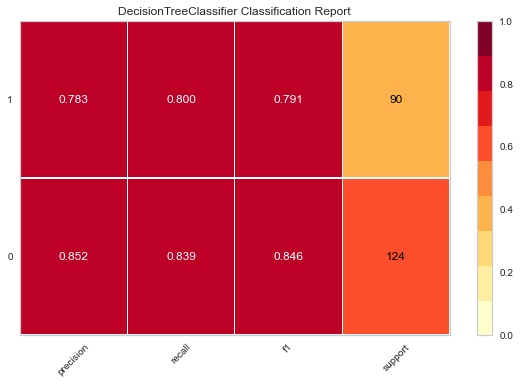

In [109]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(clf, classes=class_names, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000239EADF6580>,
                     classes=['0', '1'], model=None)

0.822429906542056

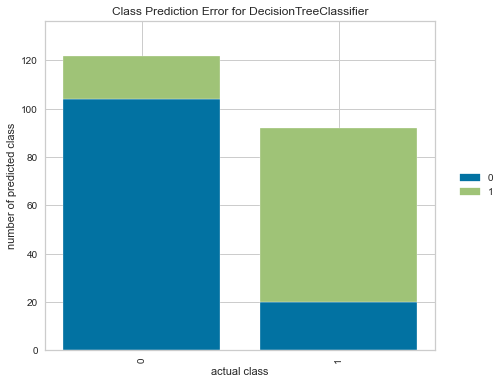

In [113]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(clf, classes=class_names)

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()

### ROC Curve

C:\Users\jnarain\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\jnarain\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2DF45550>,
       binary=None, classes=['0', '1'], model=None)

0.8770348569851927

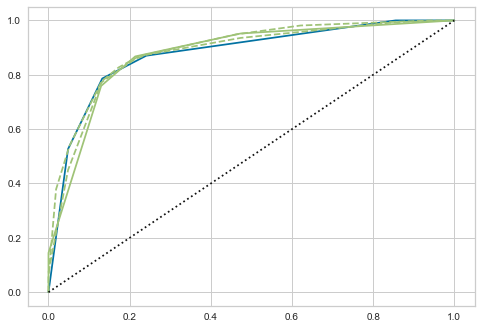

In [79]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf, classes=class_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data


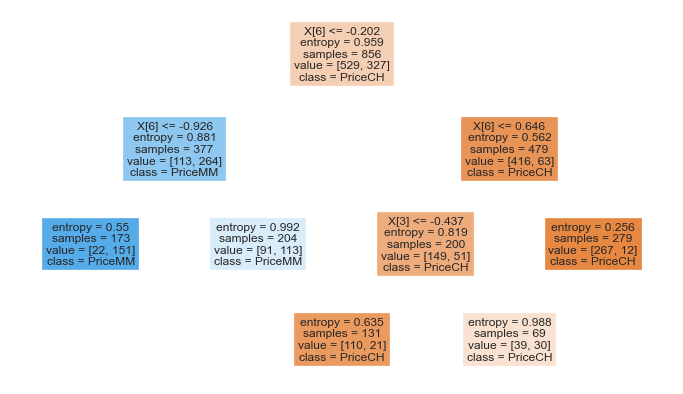

In [246]:
import matplotlib.pyplot as plt

names = list(X_train.columns.values)
eature_names=feature_names
plt.figure(figsize=(12, 7));
tree.plot_tree(clf, filled=True, class_names=names, proportion=False, fontsize=12);

## Hyperparameter Turning (of Decision Tree)

Using GridSearchCV

In [160]:
from sklearn.model_selection import GridSearchCV

base_clf = DecisionTreeClassifier(splitter="best", class_weight=None, random_state=42)
#define parameters
parameters_grid = {'criterion': ('gini', 'entropy'),
                  'max_depth': [2, 10, 50, 100, 200],
                  'max_leaf_nodes': [None, 5, 10, 50, 100],
                  'min_impurity_decrease': [0, 0.1, 0.2],
                  'min_samples_leaf': [1, 10, 50],
                  'min_samples_split': [2, 10, 50]}
clf_gs = GridSearchCV(base_clf, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)
%time clf_gs.fit(X_train, y_train)

Wall time: 1min 6s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 10, 50, 100, 200],
                         'max_leaf_nodes': [None, 5, 10, 50, 100],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 10, 50]},
             return_train_score=True, scoring='f1')

In [162]:
#list out best parameters
clf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

###### Evaluate the Performance of DT with GridSearchCV

In [163]:
y_pred_gs = clf_gs.predict(X_val)
print(confusion_matrix(y_val, y_pred_gs))
print("F1 Score = {:.2f}".format(f1_score(y_val, y_pred_gs)))

print(classification_report(y_val, y_pred_gs, target_names=class_names))
print('\n')
print("Accuracy = {:.2f}".format(accuracy_score(y_val, y_pred_gs)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_val, y_pred_gs)))
print("F1 Score = {:.2f}".format(f1_score(y_val, y_pred_gs)))
print("Log Loss = {:.2f}".format(log_loss(y_val, y_pred_gs)))

[[114  17]
 [ 20  63]]
F1 Score = 0.77
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       131
           1       0.79      0.76      0.77        83

    accuracy                           0.83       214
   macro avg       0.82      0.81      0.82       214
weighted avg       0.83      0.83      0.83       214



Accuracy = 0.83
Kappa = 0.63
F1 Score = 0.77
Log Loss = 5.97


###### MCC - DT (GridSearchCV)

In [50]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_val, y_pred_gs, sample_weight=None )

0.6337398010184832

###### ROC AUC

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2E2D50A0>,
       binary=None, classes=['0', '1'], model=None)

0.8873356019497839

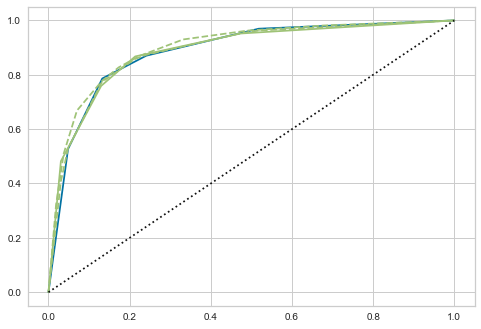

In [152]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf_gs, classes=class_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data


# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_val)

LogisticRegression(random_state=42)

## Model Parameters

In [89]:
lr_clf.coef_

array([[ 0.33876383, -0.39690968, -0.4464372 ,  0.37648355,  0.06328172,
         0.18232086, -1.84356062]])

In [98]:
lr_clf.intercept_

array([-0.75935037])

### Model Evaluation

In [99]:
print(confusion_matrix(y_val, y_pred_lr))

print(classification_report(y_val, y_pred_lr, target_names=class_names))
print('\n')
print("Accuracy = {:.2f}".format(accuracy_score(y_val, y_pred_lr)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_val, y_pred_lr)))
print("F1 Score = {:.2f}".format(f1_score(y_val, y_pred_lr)))
print("Log Loss = {:.2f}".format(log_loss(y_val, y_pred_lr)))

[[120  11]
 [ 17  66]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       131
           1       0.86      0.80      0.82        83

    accuracy                           0.87       214
   macro avg       0.87      0.86      0.86       214
weighted avg       0.87      0.87      0.87       214



Accuracy = 0.87
Kappa = 0.72
F1 Score = 0.82
Log Loss = 4.52


###### Matthews correlation coefficient (MCC) - Decision Tree

In [102]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_val, y_pred_lr, sample_weight=None )


0.7220506611661941

###### Class Prediction Error visualization

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000239F490F970>,
                     classes=['0', '1'], model=None)

0.8598130841121495

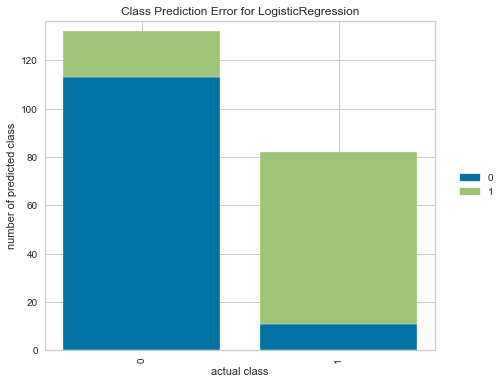

In [274]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(lr_clf, classes=class_names)

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()

###### ROC Curve

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2E2D5C70>,
       binary=None, classes=['0', '1'], model=None)

0.9315566863966729

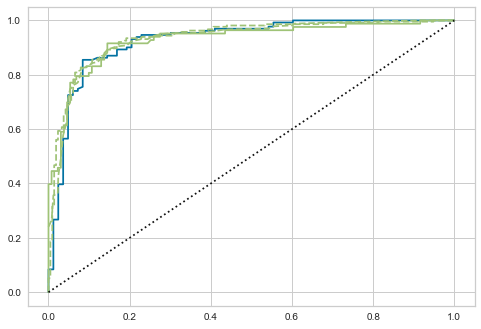

In [153]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr_clf, classes=class_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data


###### Discrimintation Threshold

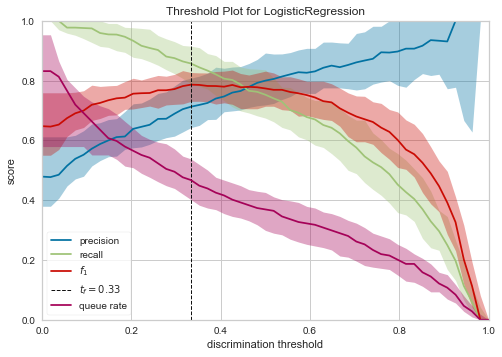

In [277]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(lr_clf);
visualizer.fit(X, y);  # Fit the training data to the visualizer
visualizer.poof();     # Draw/show/poof the data


# Random Forest (Ensemble)


Fit and train

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

### Predictions and Evaluation

In [105]:
predictions = rfc.predict(X_val)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_val,predictions))
print('\n')
print(classification_report(y_val,predictions))
print('\n')
print("Accuracy = {:.2f}".format(accuracy_score(y_val, predictions)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_val, predictions)))
print("F1 Score = {:.2f}".format(f1_score(y_val, predictions)))
print("Log Loss = {:.2f}".format(log_loss(y_val, predictions)))

[[105  26]
 [ 20  63]]


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       131
           1       0.71      0.76      0.73        83

    accuracy                           0.79       214
   macro avg       0.77      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



Accuracy = 0.79
Kappa = 0.55
F1 Score = 0.73
Log Loss = 7.42


###### Matthews correlation coefficient (MCC) - Decision Tree

In [108]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_val, predictions, sample_weight=None )


0.5541776492613071

###### ROC AUC

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2E0B6370>,
       binary=None, classes=['0', '1'], model=None)

0.8824760189355074

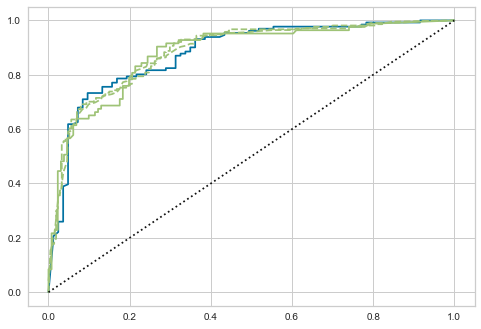

In [154]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rfc, classes=class_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data


# Hyperparameter turning of Random Forest with Random Search
Randomized Search CV

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [111]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [114]:
#show best parameters
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [115]:
best_random_grid=rf_randomcv.best_estimator_

In [118]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_val,y_pred)))
print("Classification report: {}".format(classification_report(y_val,y_pred)))

print("Accuracy = {:.2f}".format(accuracy_score(y_val, y_pred)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_val, y_pred)))
print("F1 Score = {:.2f}".format(f1_score(y_val, y_pred)))
print("Log Loss = {:.2f}".format(log_loss(y_val, y_pred)))

[[119  12]
 [ 16  67]]
Accuracy Score 0.8691588785046729
Classification report:               precision    recall  f1-score   support

           0       0.88      0.91      0.89       131
           1       0.85      0.81      0.83        83

    accuracy                           0.87       214
   macro avg       0.86      0.86      0.86       214
weighted avg       0.87      0.87      0.87       214

Accuracy = 0.87
Kappa = 0.72
F1 Score = 0.83
Log Loss = 4.52


###### Matthews correlation coefficient (MCC) - using RandomForest (Random Search)

In [120]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_val, y_pred, sample_weight=None )


0.7225706073498632

###### Class Prediction Error visualization (using random search CV) best parameters 

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2EBAB190>,
                     classes=['0', '1'], model=None)

0.8691588785046729

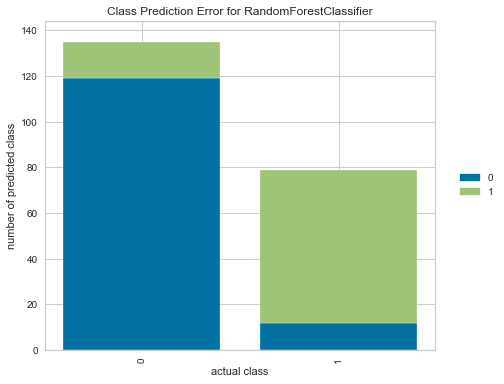

In [155]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(best_random_grid, classes=class_names)

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()

###### ROC AUC

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2E863730>,
       binary=None, classes=['0', '1'], model=None)

0.9234692770589505

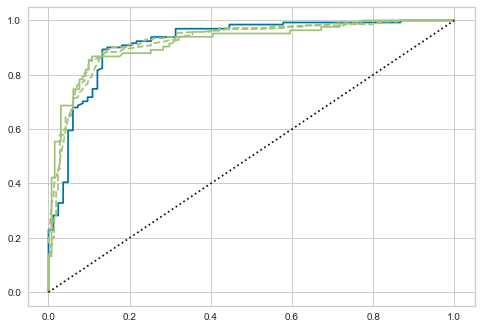

In [156]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(best_random_grid, classes=class_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data

###### Feature Importance

In [124]:
feature_names = X_train.columns

imp = pd.DataFrame({'Feature': feature_names, 'Importance': best_random_grid.feature_importances_})
imp = imp.sort_values('Importance', ascending=False)
imp.head(20)


,Feature,Importance
6,LoyalCH,0.745725
3,DiscMM,0.058983
0,PriceCH,0.054942
1,PriceMM,0.051417
2,DiscCH,0.042082
5,SpecialMM,0.036295
4,SpecialCH,0.010556


# Random Forest Hyper parameter turning using GridSearch CV

In [125]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['sqrt'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [133]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 11.4min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1000],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [134]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=8,
                       n_estimators=1200)

In [143]:
best_grid=grid_search.best_estimator_

In [144]:
best_grid

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=8,
                       n_estimators=1200)

In [146]:
y_pred1=best_grid.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_val,y_pred1)))
print("Classification report:\n {}".format(classification_report(y_val,y_pred1)))
print('\n')
print("Accuracy = {:.2f}".format(accuracy_score(y_val, y_pred1)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_val, y_pred1)))
print("F1 Score = {:.2f}".format(f1_score(y_val, y_pred1)))
print("Log Loss = {:.2f}".format(log_loss(y_val, y_pred1)))

[[119  12]
 [ 16  67]]
Accuracy Score 0.8691588785046729
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       131
           1       0.85      0.81      0.83        83

    accuracy                           0.87       214
   macro avg       0.86      0.86      0.86       214
weighted avg       0.87      0.87      0.87       214



Accuracy = 0.87
Kappa = 0.72
F1 Score = 0.83
Log Loss = 4.52


###### Matthews correlation coefficient (MCC) - Randomforest with hyperparameter tuning with GridSearchCV

In [147]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_val, y_pred1, sample_weight=None )


0.7225706073498632

###### Class Prediction Error visualization (using grid search CV) best parameters 

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2EB9A5B0>,
                     classes=['0', '1'], model=None)

0.8691588785046729

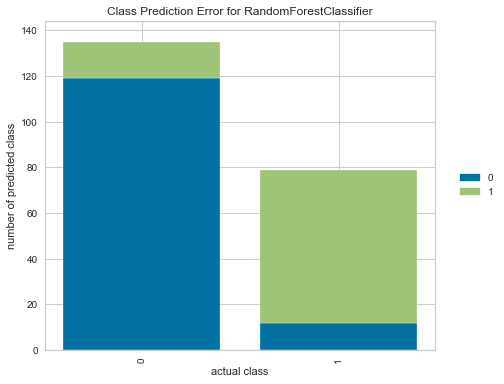

In [157]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(best_grid, classes=class_names)

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()

###### ROC AUC

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA2EB95B20>,
       binary=None, classes=['0', '1'], model=None)

0.9220977910150815

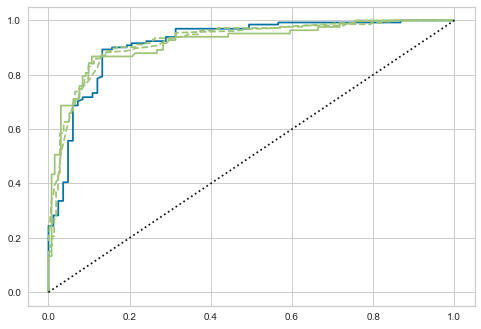

In [158]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(best_grid, classes=class_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data


###### Best Features

In [149]:
feature_names = X_train.columns

imp = pd.DataFrame({'Feature': feature_names, 'Importance': best_grid.feature_importances_})
imp = imp.sort_values('Importance', ascending=False)
imp.head(6)


,Feature,Importance
6,LoyalCH,0.749472
3,DiscMM,0.056960
0,PriceCH,0.052162
1,PriceMM,0.050034
2,DiscCH,0.043975
5,SpecialMM,0.036982


Acknowledgement:
    - Codes from Uncle Steve's github